# Researcher Use Case: Benchmarking a New Model

## Scenario

You're a climate researcher who has developed forecasts using the **FuXi** model for predicting Indian monsoon onset. You want to:

1. **Benchmark your model** against existing baselines (AIFS and Graphcast)
2. **Understand sensitivity** to the Month of Kharif (MOK) date parameter
3. **Evaluate forecast lead time** performance across different verification windows

This notebook demonstrates a complete benchmarking workflow using the MonsoonBench package.

---

## Data Overview

- **Years**: 2019-2022 (4 years of evaluation)
- **Resolution**: 4.0 degree latitude/longitude
- **Models**:
  - **FuXi**: Your new model to benchmark
  - **AIFS**: ECMWF's AI Integrated Forecasting System
  - **Graphcast**: DeepMind's GraphCast model
- **Ground Truth**: IMD (Indian Meteorological Department) rainfall observations

## Setup and Configuration

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

from monsoonbench.metrics import DeterministicOnsetMetrics
from monsoonbench.visualization import (
    create_model_comparison_table,
    plot_model_comparison_dual_axis,
)
from monsoonbench.visualization.spatial import plot_spatial_metrics

# Set up output directory
output_dir = Path("outputs/researcher_use_case")
output_dir.mkdir(parents=True, exist_ok=True)

# Configure matplotlib for better looking plots
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10

In [2]:
# Base configuration for all experiments
BASE_CONFIG = {
    "years": [2019, 2020, 2021, 2022],
    "imd_folder": "../../../data/imd_rainfall_data/4p0",
    "thres_file": "../../../data/imd_onset_threshold/mwset4x4.nc4",
    "shpfile_path": "../../../data/ind_map_shpfile/india_shapefile.shp",
    # Standard onset detection parameters
    "tolerance_days": 3,
    "verification_window": 1,
    "forecast_days": 15,
    "max_forecast_day": 15,
    "mok": True,
    "onset_window": 5,
    "mok_month": 6,
    "mok_day": 2,
}

# Model forecast data paths
MODEL_PATHS = {
    "FuXi": "../../../data/model_forecast_data/fuxi/output_daily_paper_0z_4p0/tp_lsm",
    "AIFS": "../../../data/model_forecast_data/aifs/daily_0z/tp_4p0_lsm",
    "Graphcast": "../../../data/model_forecast_data/graphcast37/output_twice_weekly_paper_0z_4p0/tp_lsm",
}

print("Configuration loaded successfully!")
print(f"Evaluation period: {BASE_CONFIG['years'][0]}-{BASE_CONFIG['years'][-1]}")
print(f"Models to compare: {', '.join(MODEL_PATHS.keys())}")

Configuration loaded successfully!
Evaluation period: 2019-2022
Models to compare: FuXi, AIFS, Graphcast


---

# Section 1: Baseline Model Comparison

First, let's benchmark all three models using standard parameters:

- **MOK Date**: June 2nd (standard)
- **Tolerance**: 3 days
- **Verification Window**: 1 day after initialization

We'll compute three key metrics:
- **FAR (False Alarm Rate)**: How often the model predicts onset when it doesn't occur
- **MR (Miss Rate)**: How often the model misses actual onset events
- **MAE (Mean Absolute Error)**: Average error in onset date prediction (in days)

## 1.1 FuXi Model (Your Model)

In [3]:
print("Computing metrics for FuXi model...\n")

metrics_fuxi = DeterministicOnsetMetrics()
df_fuxi, onset_fuxi = metrics_fuxi.compute_metrics_multiple_years(
    years=BASE_CONFIG["years"],
    imd_folder=BASE_CONFIG["imd_folder"],
    thres_file=BASE_CONFIG["thres_file"],
    model_forecast_dir=MODEL_PATHS["FuXi"],
    tolerance_days=BASE_CONFIG["tolerance_days"],
    verification_window=BASE_CONFIG["verification_window"],
    forecast_days=BASE_CONFIG["forecast_days"],
    max_forecast_day=BASE_CONFIG["max_forecast_day"],
    mok=BASE_CONFIG["mok"],
    onset_window=BASE_CONFIG["onset_window"],
    mok_month=BASE_CONFIG["mok_month"],
    mok_day=BASE_CONFIG["mok_day"],
)

spatial_fuxi = metrics_fuxi.create_spatial_far_mr_mae(df_fuxi, onset_fuxi)
print("\nFuXi metrics computed successfully!")

Computing metrics for FuXi model...


Processing year 2019
Loading IMD rainfall from: ../../../data/imd_rainfall_data/4p0/2019.nc
Renamed dimensions: {'TIME': 'time'}
Using MOK date (June 2nd) (2019-06-02) as start date for onset detection
Processing 26 init times x 8 lats x 9 lons...
Using MOK (6/2 filter) for onset detection
Only processing forecasts initialized before observed onset dates
Processing init time 1/26: 2019-05-02
Processing init time 6/26: 2019-05-20
Processing init time 11/26: 2019-06-06
Processing init time 16/26: 2019-06-24
Processing init time 21/26: 2019-07-11
Processing init time 26/26: 2019-07-29

Processing Summary:
Total potential initializations: 1872
Skipped (no observed onset): 962
Skipped (initialized after observed onset): 394
Valid initializations processed: 516
Onsets found: 93
Onset rate: 0.180
Computing onset metrics with tolerance = 3 days
Verification window starts 1 days after initialization
Forecast window length: 15 days
Processing 35 unique grid 

## 1.2 AIFS Model (Baseline 1)

In [4]:
print("Computing metrics for AIFS model...\n")

metrics_aifs = DeterministicOnsetMetrics()
df_aifs, onset_aifs = metrics_aifs.compute_metrics_multiple_years(
    years=BASE_CONFIG["years"],
    imd_folder=BASE_CONFIG["imd_folder"],
    thres_file=BASE_CONFIG["thres_file"],
    model_forecast_dir=MODEL_PATHS["AIFS"],
    tolerance_days=BASE_CONFIG["tolerance_days"],
    verification_window=BASE_CONFIG["verification_window"],
    forecast_days=BASE_CONFIG["forecast_days"],
    max_forecast_day=BASE_CONFIG["max_forecast_day"],
    mok=BASE_CONFIG["mok"],
    onset_window=BASE_CONFIG["onset_window"],
    mok_month=BASE_CONFIG["mok_month"],
    mok_day=BASE_CONFIG["mok_day"],
)

spatial_aifs = metrics_aifs.create_spatial_far_mr_mae(df_aifs, onset_aifs)
print("\nAIFS metrics computed successfully!")

Computing metrics for AIFS model...


Processing year 2019
Loading IMD rainfall from: ../../../data/imd_rainfall_data/4p0/2019.nc
Renamed dimensions: {'TIME': 'time'}
Using MOK date (June 2nd) (2019-06-02) as start date for onset detection
Processing 26 init times x 8 lats x 9 lons...
Using MOK (6/2 filter) for onset detection
Only processing forecasts initialized before observed onset dates
Processing init time 1/26: 2019-05-02
Processing init time 6/26: 2019-05-20
Processing init time 11/26: 2019-06-06
Processing init time 16/26: 2019-06-24
Processing init time 21/26: 2019-07-11
Processing init time 26/26: 2019-07-29

Processing Summary:
Total potential initializations: 1872
Skipped (no observed onset): 962
Skipped (initialized after observed onset): 394
Valid initializations processed: 516
Onsets found: 163
Onset rate: 0.316
Computing onset metrics with tolerance = 3 days
Verification window starts 1 days after initialization
Forecast window length: 15 days
Processing 35 unique grid

## 1.3 Graphcast Model (Baseline 2)

In [5]:
print("Computing metrics for Graphcast model...\n")

metrics_graphcast = DeterministicOnsetMetrics()
df_graphcast, onset_graphcast = metrics_graphcast.compute_metrics_multiple_years(
    years=BASE_CONFIG["years"],
    imd_folder=BASE_CONFIG["imd_folder"],
    thres_file=BASE_CONFIG["thres_file"],
    model_forecast_dir=MODEL_PATHS["Graphcast"],
    tolerance_days=BASE_CONFIG["tolerance_days"],
    verification_window=BASE_CONFIG["verification_window"],
    forecast_days=BASE_CONFIG["forecast_days"],
    max_forecast_day=BASE_CONFIG["max_forecast_day"],
    mok=BASE_CONFIG["mok"],
    onset_window=BASE_CONFIG["onset_window"],
    mok_month=BASE_CONFIG["mok_month"],
    mok_day=BASE_CONFIG["mok_day"],
)

spatial_graphcast = metrics_graphcast.create_spatial_far_mr_mae(df_graphcast, onset_graphcast)
print("\nGraphcast metrics computed successfully!")

Computing metrics for Graphcast model...


Processing year 2019
Loading IMD rainfall from: ../../../data/imd_rainfall_data/4p0/2019.nc
Renamed dimensions: {'TIME': 'time'}
Using MOK date (June 2nd) (2019-06-02) as start date for onset detection
Processing 26 init times x 8 lats x 9 lons...
Using MOK (6/2 filter) for onset detection
Only processing forecasts initialized before observed onset dates
Processing init time 1/26: 2019-05-02
Processing init time 6/26: 2019-05-20
Processing init time 11/26: 2019-06-06
Processing init time 16/26: 2019-06-24
Processing init time 21/26: 2019-07-11
Processing init time 26/26: 2019-07-29

Processing Summary:
Total potential initializations: 1872
Skipped (no observed onset): 962
Skipped (initialized after observed onset): 394
Valid initializations processed: 516
Onsets found: 184
Onset rate: 0.357
Computing onset metrics with tolerance = 3 days
Verification window starts 1 days after initialization
Forecast window length: 15 days
Processing 35 unique

## 1.4 Spatial Comparison Visualization

Now let's visualize the spatial patterns of model performance across India.

Detected resolution: 4.0 degrees
Using 4.0-degree CMZ polygon coordinates
Figure saved to: outputs/researcher_use_case/fuxi_spatial_metrics.png

=== CORE MONSOON ZONE (CMZ) AVERAGES ===
CMZ Mean MAE (avg across years): 4.01 ± 1.06 days
CMZ False Alarm Rate: 8.9 %
CMZ Miss Rate: 33.5 %


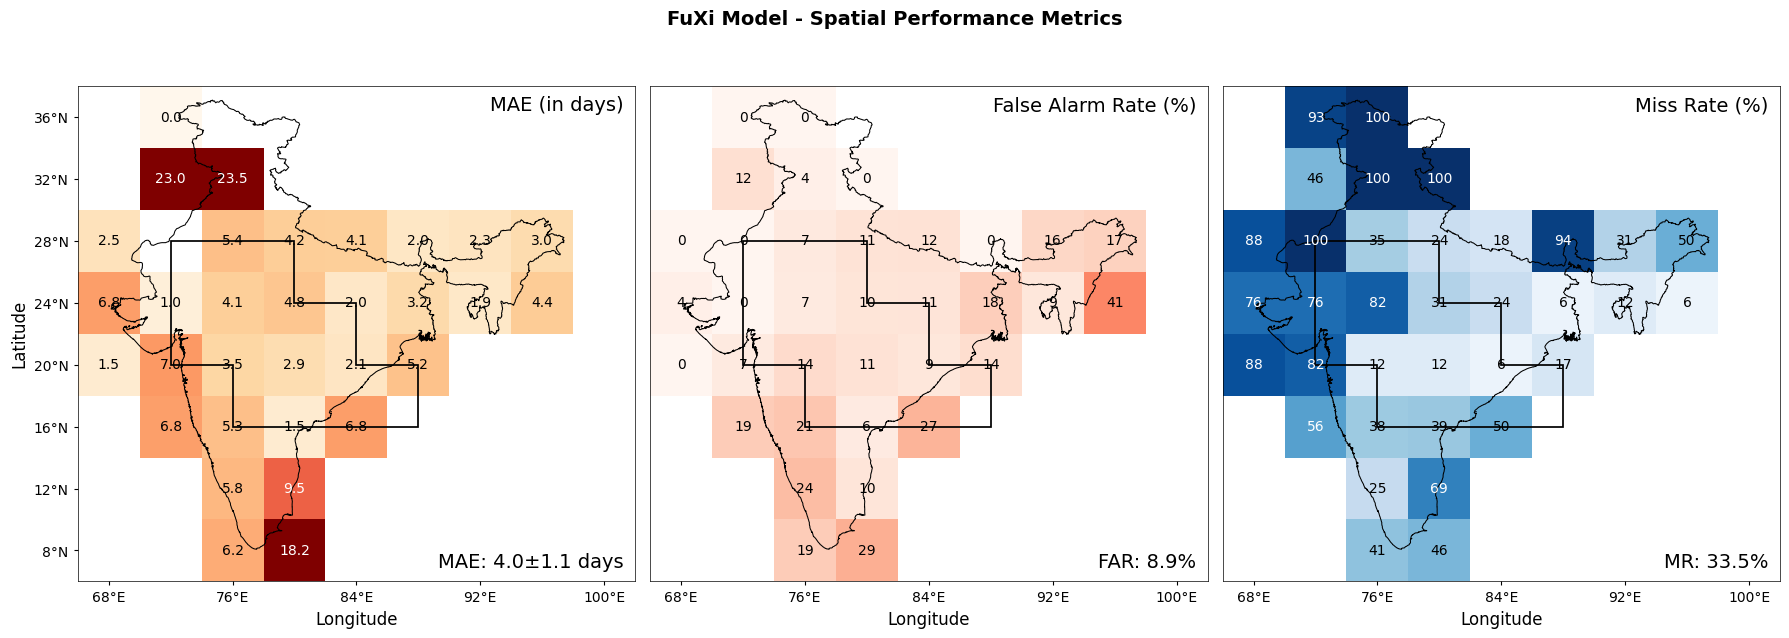

In [28]:
# FuXi spatial metrics
fig, axes = plot_spatial_metrics(
    spatial_fuxi,
    BASE_CONFIG["shpfile_path"],
    figsize=(18, 6),
    save_path=output_dir / "fuxi_spatial_metrics.png",
)
fig.suptitle("FuXi Model - Spatial Performance Metrics", fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(output_dir / "fuxi_model_performance.png", dpi=300, bbox_inches='tight')
plt.show()

Detected resolution: 4.0 degrees
Using 4.0-degree CMZ polygon coordinates
Figure saved to: outputs/researcher_use_case/aifs_spatial_metrics.png

=== CORE MONSOON ZONE (CMZ) AVERAGES ===
CMZ Mean MAE (avg across years): 4.37 ± 0.51 days
CMZ False Alarm Rate: 21.4 %
CMZ Miss Rate: 14.3 %


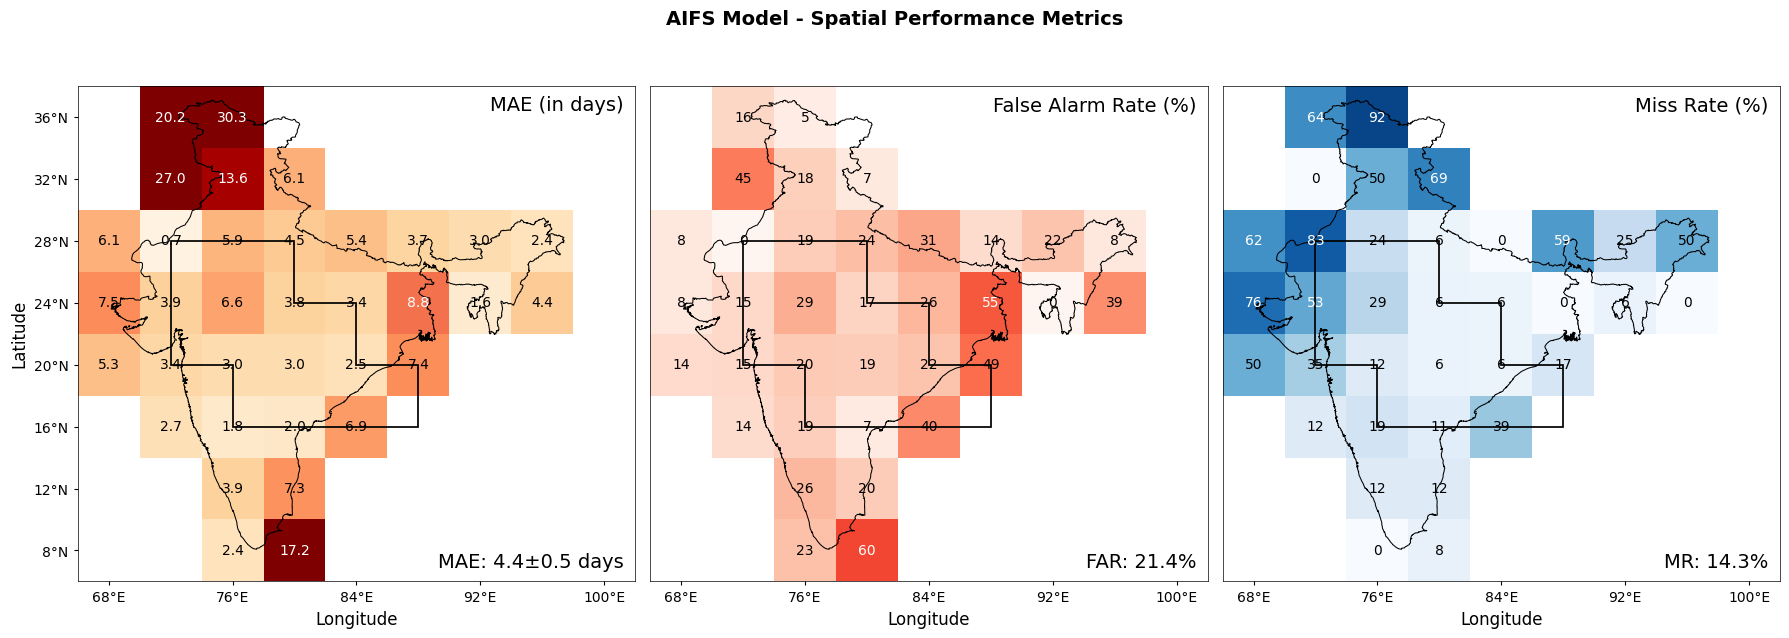

In [7]:
# AIFS spatial metrics
fig, axes = plot_spatial_metrics(
    spatial_aifs,
    BASE_CONFIG["shpfile_path"],
    figsize=(18, 6),
    save_path=output_dir / "aifs_spatial_metrics.png",
)
fig.suptitle("AIFS Model - Spatial Performance Metrics", fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Detected resolution: 4.0 degrees
Using 4.0-degree CMZ polygon coordinates
Figure saved to: outputs/researcher_use_case/graphcast_spatial_metrics.png

=== CORE MONSOON ZONE (CMZ) AVERAGES ===
CMZ Mean MAE (avg across years): 4.48 ± 0.98 days
CMZ False Alarm Rate: 25.3 %
CMZ Miss Rate: 4.7 %


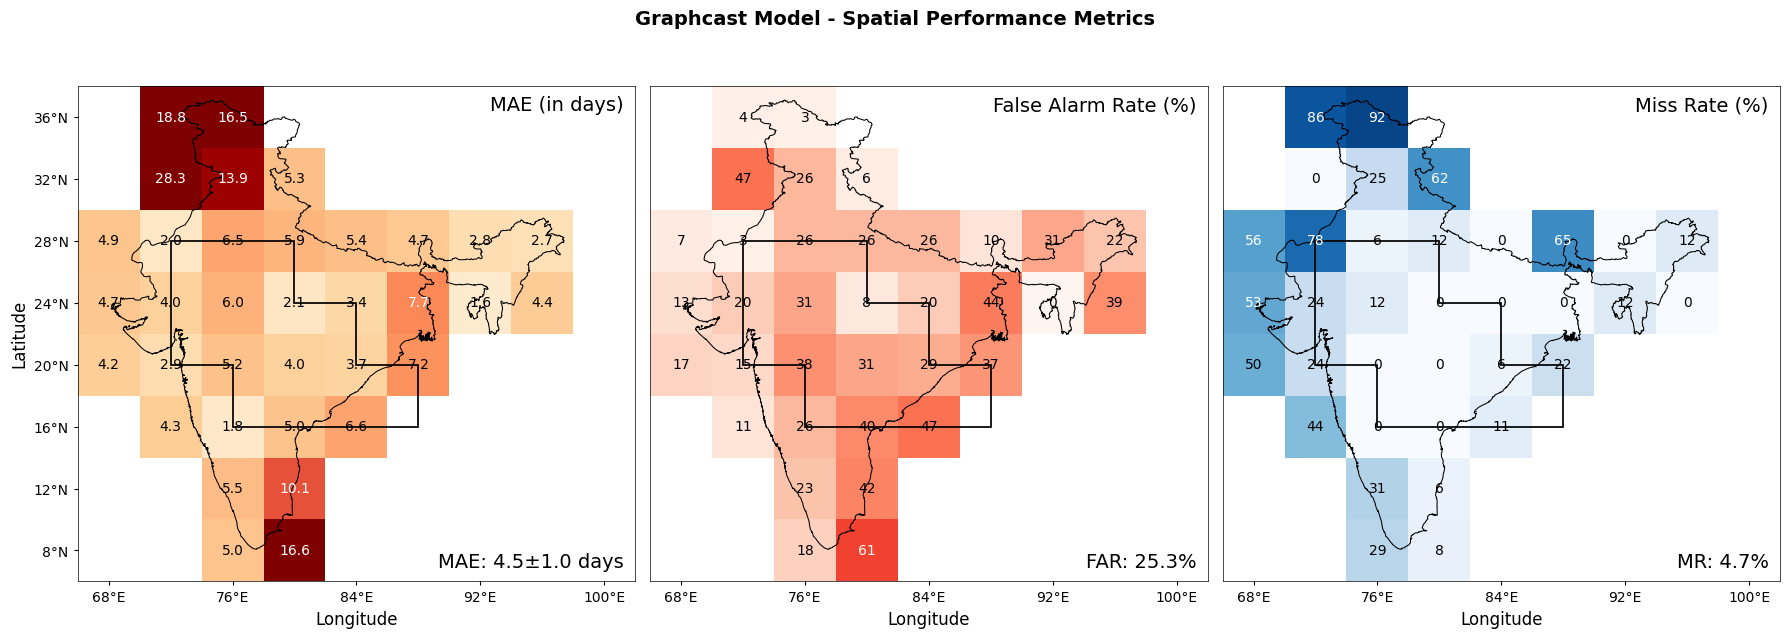

In [8]:
# Graphcast spatial metrics
fig, axes = plot_spatial_metrics(
    spatial_graphcast,
    BASE_CONFIG["shpfile_path"],
    figsize=(18, 6),
    save_path=output_dir / "graphcast_spatial_metrics.png",
)
fig.suptitle("Graphcast Model - Spatial Performance Metrics", fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 1.5 Quantitative Model Comparison

Let's create a comparison table and chart to see which model performs best.

In [9]:
# Create comparison dictionary
model_spatial_metrics = {
    "FuXi": spatial_fuxi,
    "AIFS": spatial_aifs,
    "Graphcast": spatial_graphcast,
}

# Generate comparison table
comparison_df = create_model_comparison_table(model_spatial_metrics)
print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY (2019-2022)")
print("="*80)
print(comparison_df.to_string())
print("\nMetric definitions:")
print("  - cmz_*: Central monsoon zone metrics")
print("  - overall_*: All-India metrics")
print("  - Lower MAE, FAR, and MR are better")
print("="*80)


MODEL COMPARISON SUMMARY (2019-2022)
           cmz_mae_mean_days  cmz_mae_se_days  cmz_far_pct  cmz_mr_pct  overall_mae_mean_days  overall_far_pct  overall_mr_pct
model                                                                                                                         
FuXi                4.013542         1.061337     8.900314   33.455882               5.556659        11.146214       50.670909
AIFS                4.372738         0.505939    21.354886   14.264706               6.649299        21.523563       28.632953
Graphcast           4.479940         0.979671    25.280033    4.705882               6.502999        24.246794       23.606776

Metric definitions:
  - cmz_*: Central monsoon zone metrics
  - overall_*: All-India metrics
  - Lower MAE, FAR, and MR are better


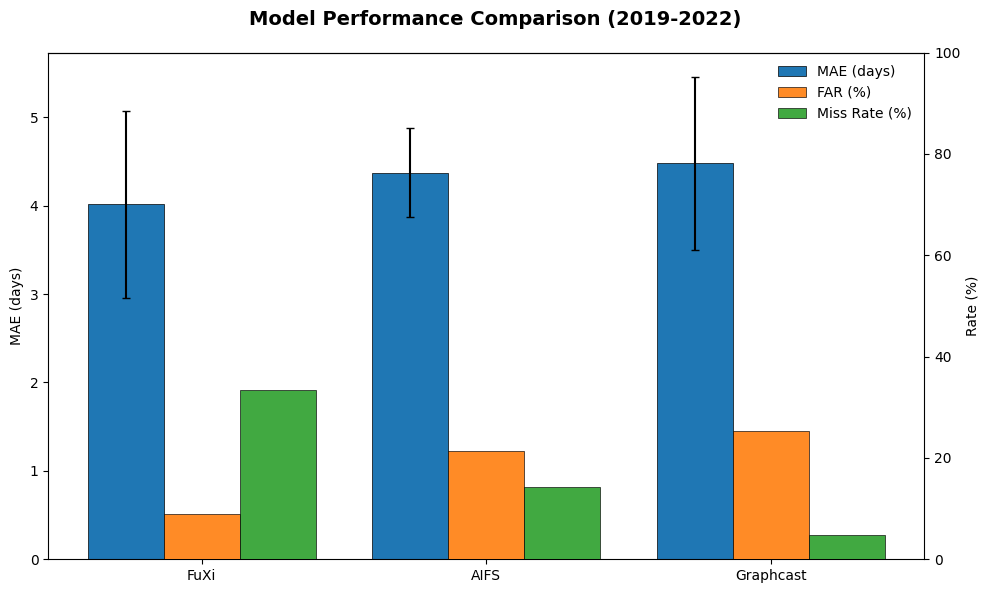

In [10]:
# Create comparison visualization
fig, (ax_left, ax_right) = plot_model_comparison_dual_axis(comparison_df)
fig.suptitle("Model Performance Comparison (2019-2022)", fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig(output_dir / "model_comparison_chart.png", dpi=300, bbox_inches='tight')
plt.show()

### Key Insights from Baseline Comparison

**Questions to consider:**
- Which model has the lowest MAE (most accurate onset date predictions)?
- Are there spatial patterns where certain models excel?
- How does FuXi compare to the established baselines?
- Do the models show similar spatial error patterns or different strengths?

## 1.6 Model Agreement Analysis

Where do models agree vs disagree? High agreement indicates predictable regions, while disagreement reveals uncertainty.

In [11]:
# Compute model agreement/disagreement metrics
import xarray as xr
import numpy as np

# Extract MAE spatial data for all three models
mae_fuxi = spatial_fuxi["mean_mae"]
mae_aifs = spatial_aifs["mean_mae"]
mae_graphcast = spatial_graphcast["mean_mae"]

# Stack MAE values into a 3D array (models × lat × lon)
mae_stack = xr.concat([mae_fuxi, mae_aifs, mae_graphcast], dim="model")
mae_stack = mae_stack.assign_coords(model=["FuXi", "AIFS", "Graphcast"])

# Create mask for valid locations (at least one model has data)
valid_mask = ~mae_stack.isnull().all(dim="model")

# Calculate agreement metrics (only where we have valid data)
# 1. Standard deviation across models (high std = disagreement)
with np.errstate(invalid='ignore'):  # Suppress warning for std of NaNs
    mae_std = mae_stack.std(dim="model", skipna=True)

# 2. Range (max - min)
mae_range = mae_stack.max(dim="model", skipna=True) - mae_stack.min(dim="model", skipna=True)

# 3. Mean performance
mae_mean = mae_stack.mean(dim="model", skipna=True)

# 4. Best model at each location (lowest MAE)
# Fill NaN with large number so argmin works, then mask invalid locations
mae_stack_filled = mae_stack.fillna(999.0)
best_model_idx = mae_stack_filled.argmin(dim="model")
# Mask out locations where all models were NaN
best_model_idx = best_model_idx.where(valid_mask)

# Create agreement categories
# High agreement: range < 2 days
# Medium agreement: 2-4 days  
# Low agreement: > 4 days
agreement_category = xr.where(mae_range < 2, 0,  # High agreement
                              xr.where(mae_range < 4, 1, 2))  # Medium, Low
# Mask invalid points
agreement_category = agreement_category.where(valid_mask)

# Only consider valid points for statistics
valid_points = valid_mask

print("Model Agreement Analysis:")
print(f"  Valid grid points: {int(valid_points.sum())} / {int(valid_points.size)}")
if valid_points.sum() > 0:
    print(f"  Mean MAE range across models: {float(mae_range.where(valid_points).mean()):.2f} days")
    print(f"  Max disagreement: {float(mae_range.where(valid_points).max()):.2f} days")
    print(f"  Min disagreement: {float(mae_range.where(valid_points).min()):.2f} days")
    print(f"\nGrid points by agreement level:")
    print(f"  High agreement (<2 days): {int((agreement_category == 0).sum())} points")
    print(f"  Medium agreement (2-4 days): {int((agreement_category == 1).sum())} points")  
    print(f"  Low agreement (>4 days): {int((agreement_category == 2).sum())} points")
else:
    print("  No valid data points found!")

Model Agreement Analysis:
  Valid grid points: 35 / 72
  Mean MAE range across models: 3.37 days
  Max disagreement: 20.22 days
  Min disagreement: 0.06 days

Grid points by agreement level:
  High agreement (<2 days): 15 points
  Medium agreement (2-4 days): 13 points
  Low agreement (>4 days): 7 points


/project/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


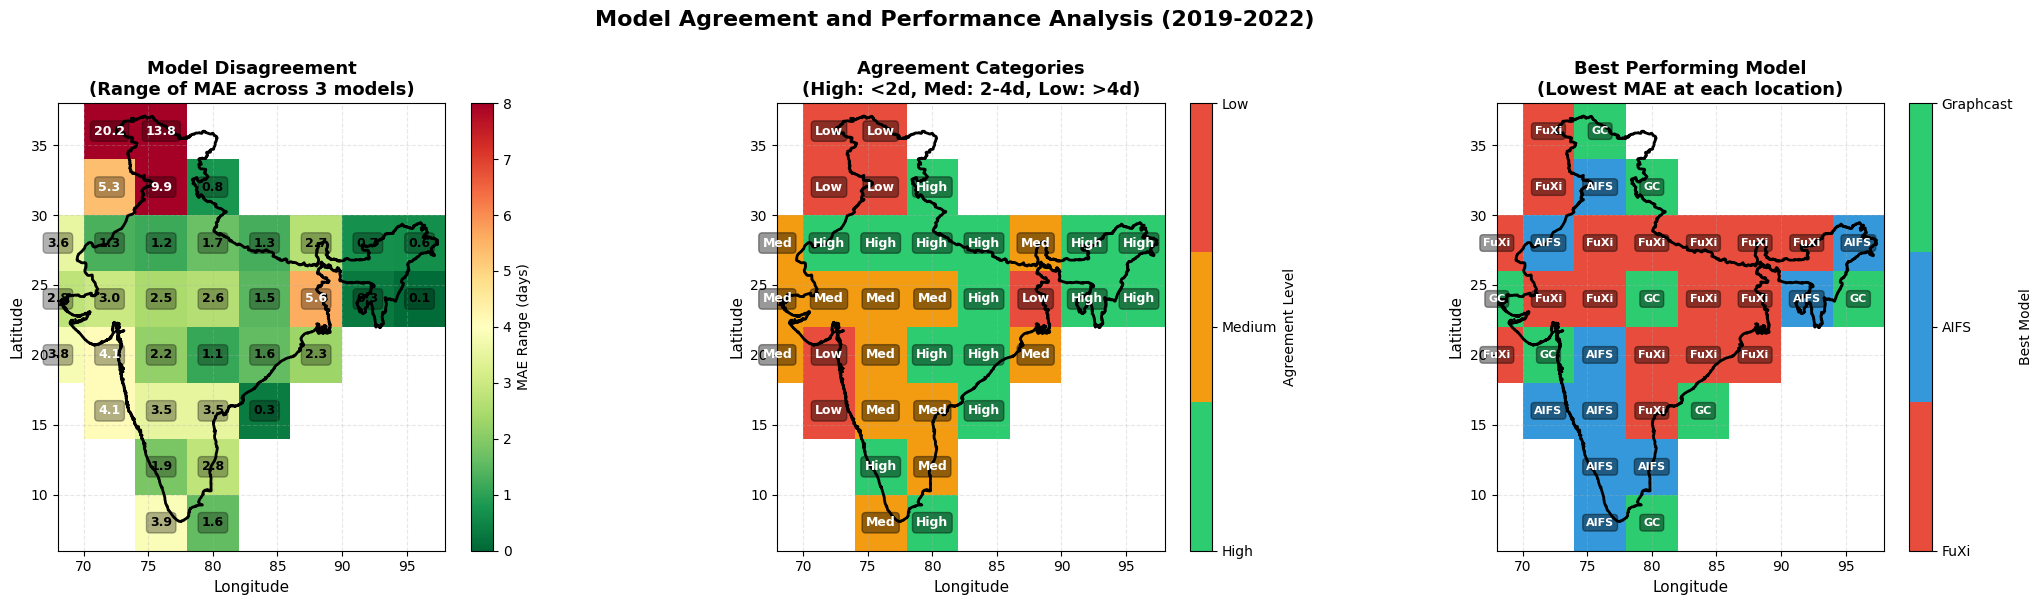

In [12]:
# Visualization 1: Agreement/Disagreement Heatmap
import geopandas as gpd
from matplotlib.colors import ListedColormap

fig, axes = plt.subplots(1, 3, figsize=(22, 6))

india_shp = gpd.read_file(BASE_CONFIG["shpfile_path"])

# Panel 1: MAE Range (Disagreement magnitude)
ax = axes[0]
im1 = ax.pcolormesh(
    mae_range.lon,
    mae_range.lat,
    mae_range.values,
    cmap="RdYlGn_r",  # Red = high disagreement, Green = high agreement
    vmin=0,
    vmax=8,
    shading="auto",
)
india_shp.boundary.plot(ax=ax, edgecolor="black", linewidth=2)

# Add value annotations
for i in range(len(mae_range.lat)):
    for j in range(len(mae_range.lon)):
        val = mae_range.values[i, j]
        if not np.isnan(val):
            ax.text(
                mae_range.lon.values[j],
                mae_range.lat.values[i],
                f'{val:.1f}',
                ha='center',
                va='center',
                fontsize=9,
                fontweight='bold',
                color='white' if val > 4 else 'black',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.3)
            )

ax.set_xlabel("Longitude", fontsize=11)
ax.set_ylabel("Latitude", fontsize=11)
ax.set_title("Model Disagreement\n(Range of MAE across 3 models)", fontsize=13, fontweight="bold")
ax.set_xlim(68, 98)
ax.set_ylim(6, 38)
ax.grid(True, alpha=0.3, linestyle='--')
cbar1 = plt.colorbar(im1, ax=ax, fraction=0.046, pad=0.04)
cbar1.set_label("MAE Range (days)", fontsize=10)

# Panel 2: Agreement Categories
ax = axes[1]
# Create custom colormap for categories
colors = ['#2ecc71', '#f39c12', '#e74c3c']  # Green, Orange, Red
cmap_agreement = ListedColormap(colors)

im2 = ax.pcolormesh(
    agreement_category.lon,
    agreement_category.lat,
    agreement_category.values,
    cmap=cmap_agreement,
    vmin=0,
    vmax=2,
    shading="auto",
)
india_shp.boundary.plot(ax=ax, edgecolor="black", linewidth=2)

# Add category labels
category_labels = {0: "High", 1: "Med", 2: "Low"}
for i in range(len(agreement_category.lat)):
    for j in range(len(agreement_category.lon)):
        val = agreement_category.values[i, j]
        if not np.isnan(val):
            ax.text(
                agreement_category.lon.values[j],
                agreement_category.lat.values[i],
                category_labels[int(val)],
                ha='center',
                va='center',
                fontsize=9,
                fontweight='bold',
                color='white',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.4)
            )

ax.set_xlabel("Longitude", fontsize=11)
ax.set_ylabel("Latitude", fontsize=11)
ax.set_title("Agreement Categories\n(High: <2d, Med: 2-4d, Low: >4d)", fontsize=13, fontweight="bold")
ax.set_xlim(68, 98)
ax.set_ylim(6, 38)
ax.grid(True, alpha=0.3, linestyle='--')
cbar2 = plt.colorbar(im2, ax=ax, fraction=0.046, pad=0.04, ticks=[0, 1, 2])
cbar2.set_label("Agreement Level", fontsize=10)
cbar2.ax.set_yticklabels(['High', 'Medium', 'Low'])

# Panel 3: Best Model at Each Location
ax = axes[2]
# Color code by model
model_colors = {'FuXi': 0, 'AIFS': 1, 'Graphcast': 2}
best_model_numeric = xr.zeros_like(best_model_idx, dtype=float)
for i, model in enumerate(["FuXi", "AIFS", "Graphcast"]):
    best_model_numeric = xr.where(best_model_idx == i, i, best_model_numeric)

# Mask out invalid points (outside India or where all models are NaN)
best_model_numeric = best_model_numeric.where(valid_mask)

colors_models = ['#e74c3c', '#3498db', '#2ecc71']  # FuXi=Red, AIFS=Blue, Graphcast=Green
cmap_models = ListedColormap(colors_models)

im3 = ax.pcolormesh(
    best_model_numeric.lon,
    best_model_numeric.lat,
    best_model_numeric.values,
    cmap=cmap_models,
    vmin=0,
    vmax=2,
    shading="auto",
)
india_shp.boundary.plot(ax=ax, edgecolor="black", linewidth=2)

# Add model name labels
model_labels = {0: "FuXi", 1: "AIFS", 2: "GC"}
for i in range(len(best_model_numeric.lat)):
    for j in range(len(best_model_numeric.lon)):
        val = best_model_numeric.values[i, j]
        if not np.isnan(val):
            ax.text(
                best_model_numeric.lon.values[j],
                best_model_numeric.lat.values[i],
                model_labels[int(val)],
                ha='center',
                va='center',
                fontsize=8,
                fontweight='bold',
                color='white',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.4)
            )

ax.set_xlabel("Longitude", fontsize=11)
ax.set_ylabel("Latitude", fontsize=11)
ax.set_title("Best Performing Model\n(Lowest MAE at each location)", fontsize=13, fontweight="bold")
ax.set_xlim(68, 98)
ax.set_ylim(6, 38)
ax.grid(True, alpha=0.3, linestyle='--')
cbar3 = plt.colorbar(im3, ax=ax, fraction=0.046, pad=0.04, ticks=[0, 1, 2])
cbar3.set_label("Best Model", fontsize=10)
cbar3.ax.set_yticklabels(['FuXi', 'AIFS', 'Graphcast'])

fig.suptitle(
    "Model Agreement and Performance Analysis (2019-2022)",
    fontsize=16,
    fontweight="bold",
    y=1.00,
)
plt.tight_layout()
plt.savefig(output_dir / "model_agreement_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

In [13]:
# Summary statistics by region
print("\n" + "="*80)
print("MODEL AGREEMENT INSIGHTS")
print("="*80)

# Count best model occurrences (excluding NaN)
valid_best = ~best_model_idx.isnull()
fuxi_best = int((best_model_idx == 0).sum())
aifs_best = int((best_model_idx == 1).sum())
graphcast_best = int((best_model_idx == 2).sum())
total_points = fuxi_best + aifs_best + graphcast_best

if total_points > 0:
    print("\nBest Model by Location:")
    print(f"  FuXi wins: {fuxi_best}/{total_points} locations ({100*fuxi_best/total_points:.1f}%)")
    print(f"  AIFS wins: {aifs_best}/{total_points} locations ({100*aifs_best/total_points:.1f}%)")
    print(f"  Graphcast wins: {graphcast_best}/{total_points} locations ({100*graphcast_best/total_points:.1f}%)")

    # Agreement statistics
    valid_agreement = ~agreement_category.isnull()
    high_agreement_pct = 100 * int((agreement_category == 0).sum()) / total_points
    medium_agreement_pct = 100 * int((agreement_category == 1).sum()) / total_points
    low_agreement_pct = 100 * int((agreement_category == 2).sum()) / total_points

    print("\nPrediction Reliability:")
    print(f"  High confidence regions (all models agree): {high_agreement_pct:.1f}%")
    print(f"  Medium confidence regions: {medium_agreement_pct:.1f}%")
    print(f"  Low confidence regions (models disagree): {low_agreement_pct:.1f}%")

    # Find most/least predictable regions (excluding NaN)
    valid_range = mae_range.where(~mae_range.isnull())
    if valid_range.size > 0:
        max_disagreement_idx = valid_range.argmax(dim=['lat', 'lon'])
        min_disagreement_idx = valid_range.argmin(dim=['lat', 'lon'])

        max_lat = float(mae_range.lat[max_disagreement_idx['lat']])
        max_lon = float(mae_range.lon[max_disagreement_idx['lon']])
        min_lat = float(mae_range.lat[min_disagreement_idx['lat']])
        min_lon = float(mae_range.lon[min_disagreement_idx['lon']])

        print("\nGeographic Patterns:")
        print(f"  Most unpredictable: ({max_lat:.0f}°N, {max_lon:.0f}°E) - {float(valid_range.max()):.1f} day disagreement")
        print(f"  Most predictable: ({min_lat:.0f}°N, {min_lon:.0f}°E) - {float(valid_range.min()):.1f} day disagreement")

    print("\nKey Takeaway:")
    print("  🎯 Green regions = High confidence (use any model)")
    print("  ⚠️  Orange regions = Medium confidence (ensemble recommended)")
    print("  🚨 Red regions = Low confidence (inherently unpredictable)")
else:
    print("\n⚠️  No valid grid points found for comparison")
    
print("="*80)


MODEL AGREEMENT INSIGHTS

Best Model by Location:
  FuXi wins: 17/35 locations (48.6%)
  AIFS wins: 10/35 locations (28.6%)
  Graphcast wins: 8/35 locations (22.9%)

Prediction Reliability:
  High confidence regions (all models agree): 42.9%
  Medium confidence regions: 37.1%
  Low confidence regions (models disagree): 20.0%

Geographic Patterns:
  Most unpredictable: (36°N, 72°E) - 20.2 day disagreement
  Most predictable: (24°N, 96°E) - 0.1 day disagreement

Key Takeaway:
  🎯 Green regions = High confidence (use any model)
  ⚠️  Orange regions = Medium confidence (ensemble recommended)
  🚨 Red regions = Low confidence (inherently unpredictable)


### Key Insights from Model Agreement Analysis

**What This Tells Us:**

1. **Panel 1 (Disagreement)**: Red regions = models strongly disagree (unpredictable), Green = models agree (predictable)
   
2. **Panel 2 (Agreement Categories)**: 
   - **Green (High)**: All models within 2 days → Trust any model
   - **Orange (Medium)**: 2-4 day spread → Use ensemble average
   - **Red (Low)**: >4 day spread → Inherently difficult to predict

3. **Panel 3 (Best Model)**: Shows which model performs best in each region
   - Reveals geographic specialization of models
   - No single model dominates everywhere!

**For Presentations:**
- This visualization is **unique** - shows prediction confidence geographically
- Red regions might need better observational data or different modeling approaches
- Green regions are "solved" - any model works well
- Orange regions benefit from ensemble forecasting

---

# Section 2: MOK Date Sensitivity Analysis

The **Month of Kharif (MOK) date** is a critical parameter that filters which onset predictions are counted. The standard date is **June 2nd**, but this choice affects results.

Let's investigate how FuXi's performance changes with different MOK dates:

- **May 15**: Early monsoon filter
- **May 25**: Mid-May filter
- **June 2**: Standard (baseline)
- **June 10**: Late filter
- **June 20**: Very late filter

This analysis reveals how sensitive our conclusions are to this parameter choice.

In [14]:
# Define MOK dates to test
MOK_DATES = [
    (5, 15, "May 15"),
    (5, 25, "May 25"),
    (6, 2, "June 2 (standard)"),
    (6, 10, "June 10"),
    (6, 20, "June 20"),
]

print(f"Testing {len(MOK_DATES)} different MOK dates...")

Testing 5 different MOK dates...


In [15]:
# Compute FuXi metrics for each MOK date
mok_results = {}

for mok_month, mok_day, label in MOK_DATES:
    print(f"\n{'='*60}")
    print(f"Computing metrics for MOK date: {label}")
    print(f"{'='*60}\n")
    
    metrics = DeterministicOnsetMetrics()
    df, onset_dict = metrics.compute_metrics_multiple_years(
        years=BASE_CONFIG["years"],
        imd_folder=BASE_CONFIG["imd_folder"],
        thres_file=BASE_CONFIG["thres_file"],
        model_forecast_dir=MODEL_PATHS["FuXi"],
        tolerance_days=BASE_CONFIG["tolerance_days"],
        verification_window=BASE_CONFIG["verification_window"],
        forecast_days=BASE_CONFIG["forecast_days"],
        max_forecast_day=BASE_CONFIG["max_forecast_day"],
        mok=True,
        onset_window=BASE_CONFIG["onset_window"],
        mok_month=mok_month,
        mok_day=mok_day,
    )
    
    spatial = metrics.create_spatial_far_mr_mae(df, onset_dict)
    mok_results[label] = {
        "df": df,
        "onset": onset_dict,
        "spatial": spatial,
        "month": mok_month,
        "day": mok_day,
    }

print("\n" + "="*60)
print("MOK sensitivity analysis complete!")
print("="*60)


Computing metrics for MOK date: May 15


Processing year 2019
Loading IMD rainfall from: ../../../data/imd_rainfall_data/4p0/2019.nc
Renamed dimensions: {'TIME': 'time'}
Using MOK date (June 2nd) (2019-06-02) as start date for onset detection
Processing 26 init times x 8 lats x 9 lons...
Using MOK (5/15 filter) for onset detection
Only processing forecasts initialized before observed onset dates
Processing init time 1/26: 2019-05-02
Processing init time 6/26: 2019-05-20
Processing init time 11/26: 2019-06-06
Processing init time 16/26: 2019-06-24
Processing init time 21/26: 2019-07-11
Processing init time 26/26: 2019-07-29

Processing Summary:
Total potential initializations: 1872
Skipped (no observed onset): 962
Skipped (initialized after observed onset): 394
Valid initializations processed: 516
Onsets found: 105
Onset rate: 0.203
Computing onset metrics with tolerance = 3 days
Verification window starts 1 days after initialization
Forecast window length: 15 days
Processing 35 unique

## 2.1 Spatial Visualization: How MOK Date Affects Results

Let's create a multi-panel figure showing how spatial patterns change with different MOK dates.

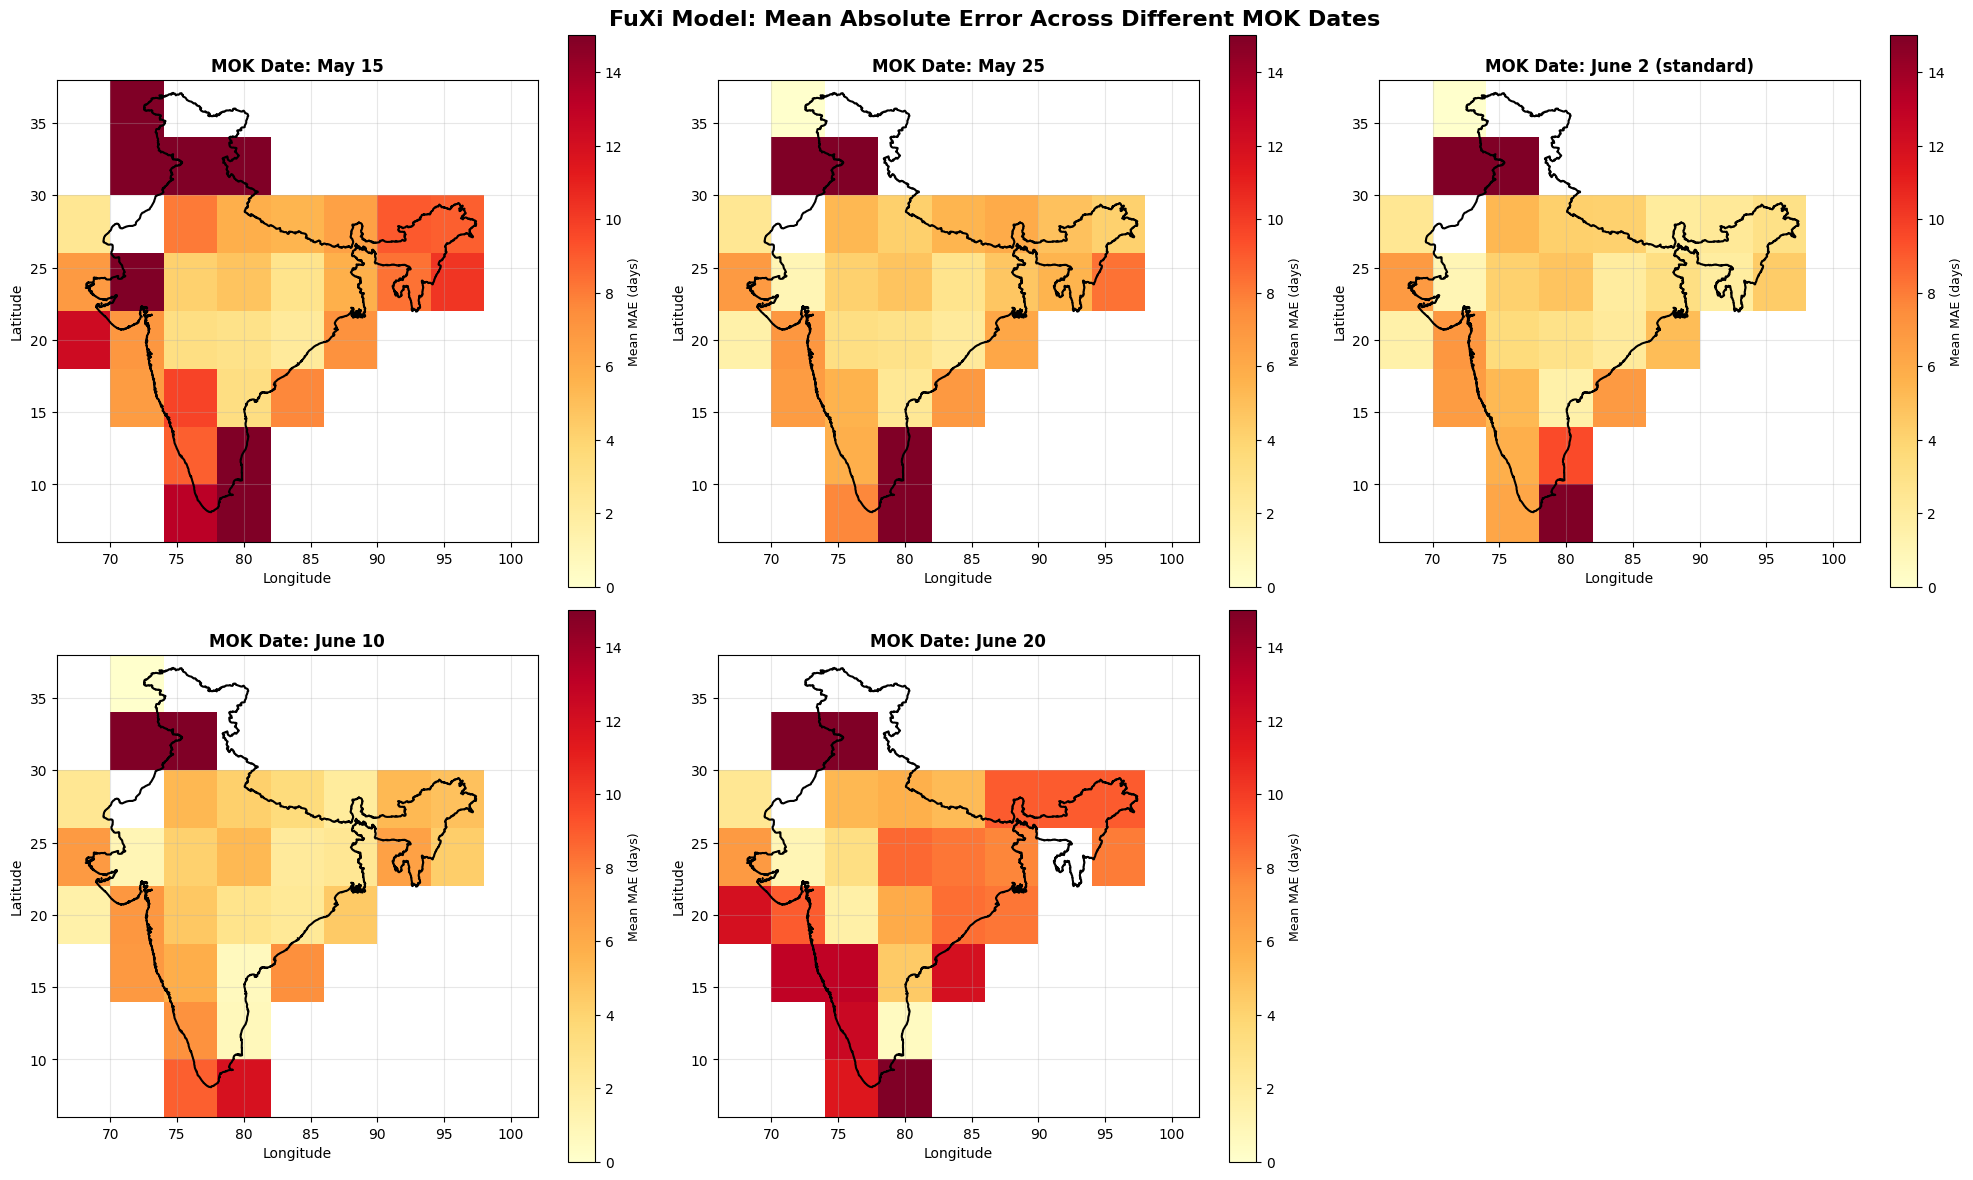

In [16]:
# Create multi-panel comparison of MOK dates
# We'll focus on Mean MAE to show how accuracy changes

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

import geopandas as gpd
india_shp = gpd.read_file(BASE_CONFIG["shpfile_path"])

for idx, (label, result) in enumerate(mok_results.items()):
    if idx >= 5:  # We have 5 MOK dates
        break
    
    ax = axes[idx]
    spatial = result["spatial"]
    
    # Plot mean MAE
    mae_data = spatial["mean_mae"]
    im = ax.pcolormesh(
        mae_data.lon,
        mae_data.lat,
        mae_data.values,
        cmap="YlOrRd",
        vmin=0,
        vmax=15,
        shading="auto",
    )
    
    # Overlay India shapefile
    india_shp.boundary.plot(ax=ax, edgecolor="black", linewidth=1.5)
    
    ax.set_xlabel("Longitude", fontsize=10)
    ax.set_ylabel("Latitude", fontsize=10)
    ax.set_title(f"MOK Date: {label}", fontsize=12, fontweight="bold")
    ax.grid(True, alpha=0.3)
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label("Mean MAE (days)", fontsize=9)

# Remove extra subplot
fig.delaxes(axes[5])

fig.suptitle(
    "FuXi Model: Mean Absolute Error Across Different MOK Dates",
    fontsize=16,
    fontweight="bold",
    y=0.98,
)
plt.tight_layout()
plt.savefig(output_dir / "mok_sensitivity_spatial.png", dpi=300, bbox_inches='tight')
plt.show()

## 2.2 Quantitative MOK Sensitivity

In [17]:
# Create summary table of metrics across MOK dates
mok_comparison = {}

for label, result in mok_results.items():
    spatial_dict = {label: result["spatial"]}
    summary = create_model_comparison_table(spatial_dict)
    mok_comparison[label] = summary.iloc[0]

mok_df = pd.DataFrame(mok_comparison).T

print("\n" + "="*100)
print("FuXi MODEL: MOK DATE SENSITIVITY ANALYSIS")
print("="*100)
print(mok_df.to_string())
print("\nObservation: How do MAE, FAR, and MR change as the MOK date shifts?")
print("="*100)


FuXi MODEL: MOK DATE SENSITIVITY ANALYSIS
                   cmz_mae_mean_days  cmz_mae_se_days  cmz_far_pct  cmz_mr_pct  overall_mae_mean_days  overall_far_pct  overall_mr_pct
May 15                      4.548542         1.022360     9.263951   33.455882               9.185136        20.572839       48.745947
May 25                      4.013542         1.061337     8.900314   33.455882               6.636589        15.840468       49.322870
June 2 (standard)           4.013542         1.061337     8.900314   33.455882               5.556659        11.146214       50.670909
June 10                     4.122708         1.103579     8.786754   33.455882               5.681474         9.981542       54.013939
June 20                     7.024167         1.230376    11.512983   56.617647               8.934036         6.630435       75.394042

Observation: How do MAE, FAR, and MR change as the MOK date shifts?


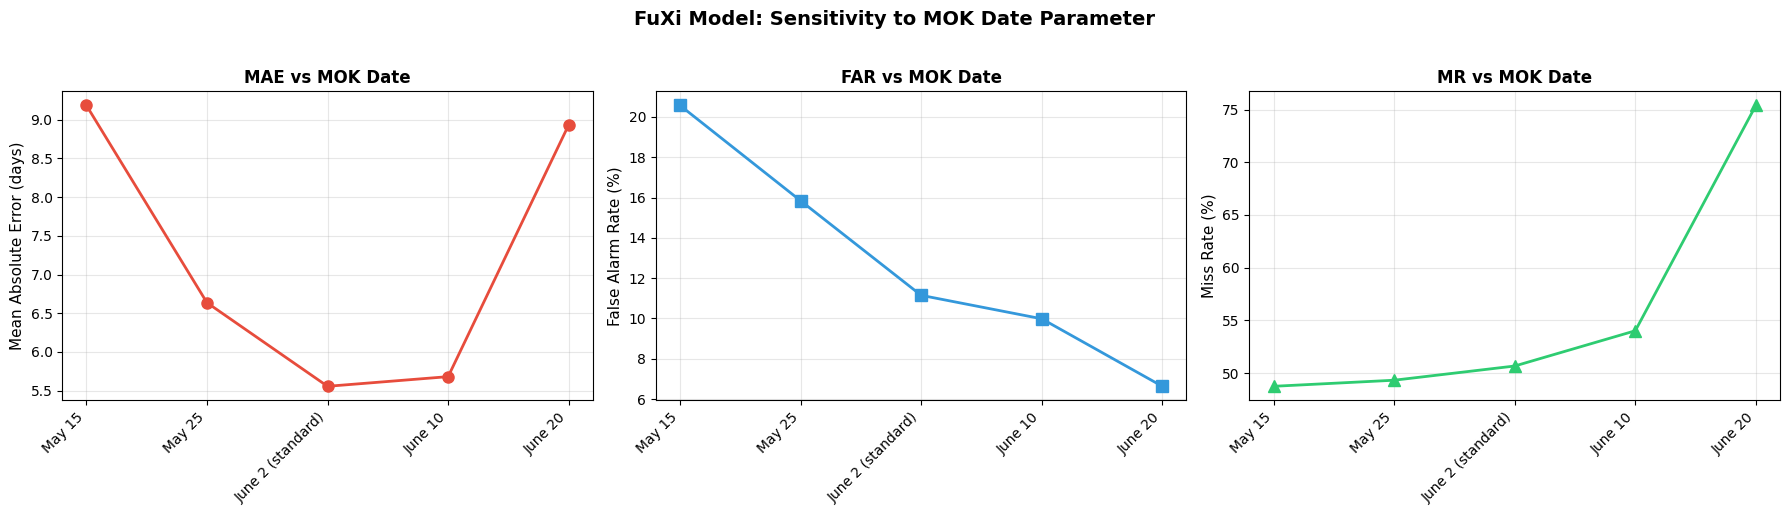

In [18]:
# Plot how metrics change with MOK date
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

mok_labels = list(mok_comparison.keys())
x_pos = np.arange(len(mok_labels))

# MAE trend
axes[0].plot(x_pos, mok_df["overall_mae_mean_days"], marker='o', linewidth=2, markersize=8, color='#e74c3c')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(mok_labels, rotation=45, ha='right')
axes[0].set_ylabel("Mean Absolute Error (days)", fontsize=11)
axes[0].set_title("MAE vs MOK Date", fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# FAR trend
axes[1].plot(x_pos, mok_df["overall_far_pct"], marker='s', linewidth=2, markersize=8, color='#3498db')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(mok_labels, rotation=45, ha='right')
axes[1].set_ylabel("False Alarm Rate (%)", fontsize=11)
axes[1].set_title("FAR vs MOK Date", fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# MR trend
axes[2].plot(x_pos, mok_df["overall_mr_pct"], marker='^', linewidth=2, markersize=8, color='#2ecc71')
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(mok_labels, rotation=45, ha='right')
axes[2].set_ylabel("Miss Rate (%)", fontsize=11)
axes[2].set_title("MR vs MOK Date", fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

fig.suptitle("FuXi Model: Sensitivity to MOK Date Parameter", fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(output_dir / "mok_sensitivity_trends.png", dpi=300, bbox_inches='tight')
plt.show()

### Key Insights from MOK Sensitivity

**Questions to consider:**
- How stable are the model's performance metrics across different MOK dates?
- Are certain regions more sensitive to the MOK parameter than others?
- What does this tell us about the robustness of our benchmarking conclusions?
- Should we use multiple MOK dates when evaluating models?

---

# Section 3: Forecast Lead Time Analysis

The **verification window** parameter determines how many days after initialization we start verifying forecasts. This represents the practical question:

> **"How far in advance can we reliably predict monsoon onset?"**

Let's test all three models with different verification windows:

- **0 days**: Same-day verification (shortest lead time)
- **1 day**: Next-day verification (standard)
- **3 days**: 3-day lead time
- **5 days**: 5-day lead time
- **7 days**: 7-day lead time (longest)

We expect performance to degrade with longer lead times, but the rate of degradation reveals each model's forecasting skill.

In [19]:
# Define verification windows to test
VERIFICATION_WINDOWS = [0, 1, 3, 5, 7]

print(f"Testing {len(VERIFICATION_WINDOWS)} verification windows: {VERIFICATION_WINDOWS} days")

Testing 5 verification windows: [0, 1, 3, 5, 7] days


In [20]:
# Compute metrics for all models across verification windows
verification_results = {model_name: {} for model_name in MODEL_PATHS.keys()}

for model_name, model_path in MODEL_PATHS.items():
    print(f"\n{'='*70}")
    print(f"Processing {model_name} model across verification windows")
    print(f"{'='*70}\n")
    
    for vw in VERIFICATION_WINDOWS:
        print(f"  Verification window: {vw} days...")
        
        metrics = DeterministicOnsetMetrics()
        df, onset_dict = metrics.compute_metrics_multiple_years(
            years=BASE_CONFIG["years"],
            imd_folder=BASE_CONFIG["imd_folder"],
            thres_file=BASE_CONFIG["thres_file"],
            model_forecast_dir=model_path,
            tolerance_days=BASE_CONFIG["tolerance_days"],
            verification_window=vw,
            forecast_days=BASE_CONFIG["forecast_days"],
            max_forecast_day=BASE_CONFIG["max_forecast_day"],
            mok=BASE_CONFIG["mok"],
            onset_window=BASE_CONFIG["onset_window"],
            mok_month=BASE_CONFIG["mok_month"],
            mok_day=BASE_CONFIG["mok_day"],
        )
        
        spatial = metrics.create_spatial_far_mr_mae(df, onset_dict)
        verification_results[model_name][vw] = {
            "df": df,
            "onset": onset_dict,
            "spatial": spatial,
        }

print("\n" + "="*70)
print("Verification window analysis complete!")
print("="*70)


Processing FuXi model across verification windows

  Verification window: 0 days...

Processing year 2019
Loading IMD rainfall from: ../../../data/imd_rainfall_data/4p0/2019.nc
Renamed dimensions: {'TIME': 'time'}
Using MOK date (June 2nd) (2019-06-02) as start date for onset detection
Processing 26 init times x 8 lats x 9 lons...
Using MOK (6/2 filter) for onset detection
Only processing forecasts initialized before observed onset dates
Processing init time 1/26: 2019-05-02
Processing init time 6/26: 2019-05-20
Processing init time 11/26: 2019-06-06
Processing init time 16/26: 2019-06-24
Processing init time 21/26: 2019-07-11
Processing init time 26/26: 2019-07-29

Processing Summary:
Total potential initializations: 1872
Skipped (no observed onset): 962
Skipped (initialized after observed onset): 394
Valid initializations processed: 516
Onsets found: 93
Onset rate: 0.180
Computing onset metrics with tolerance = 3 days
Verification window starts 0 days after initialization
Forecast w

## 3.1 Performance vs Forecast Lead Time

In [21]:
# Extract metrics for each model and verification window
vw_summary = {}

for model_name in MODEL_PATHS.keys():
    vw_summary[model_name] = {}
    for vw in VERIFICATION_WINDOWS:
        spatial_dict = {f"{model_name}_{vw}d": verification_results[model_name][vw]["spatial"]}
        summary = create_model_comparison_table(spatial_dict)
        vw_summary[model_name][vw] = summary.iloc[0]

# Convert to DataFrames for easier plotting
vw_dfs = {model: pd.DataFrame(data).T for model, data in vw_summary.items()}

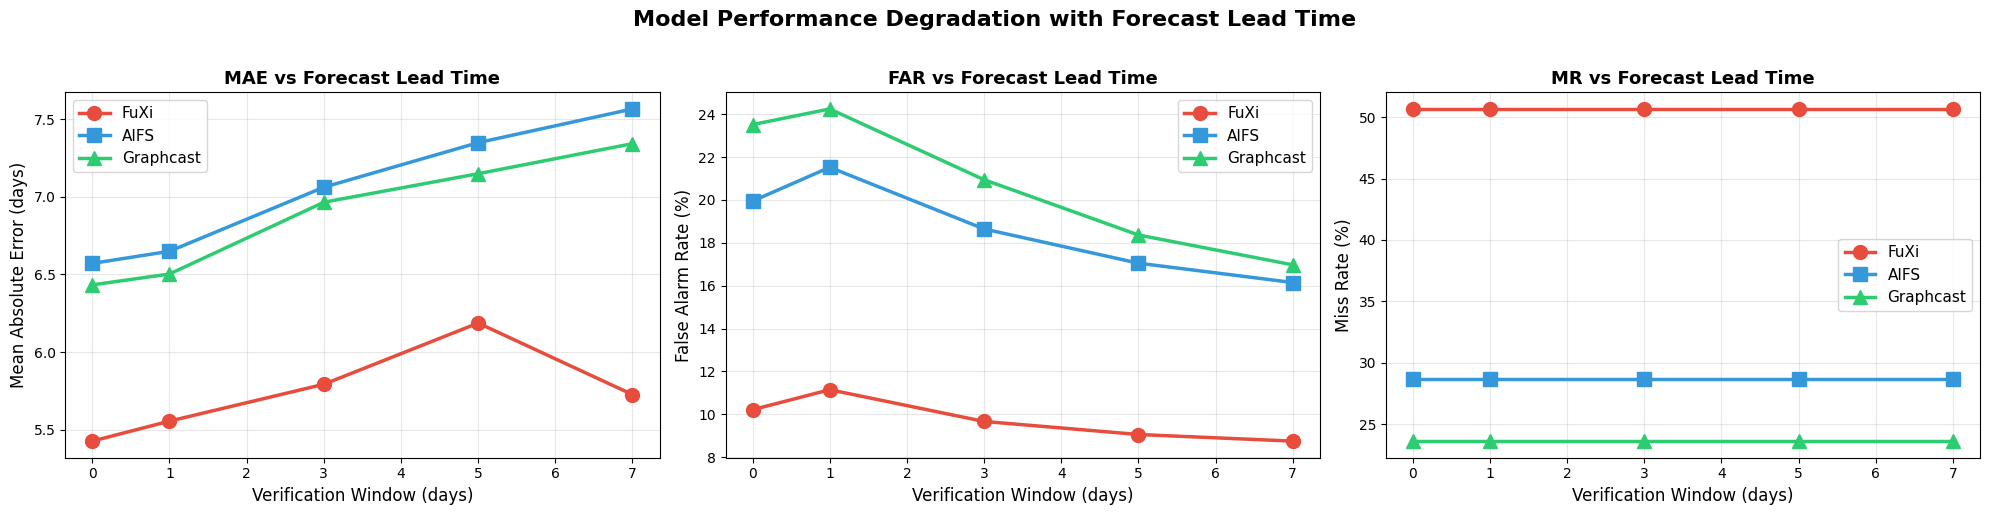

In [22]:
# Plot how metrics degrade with lead time for all models
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

colors = {'FuXi': '#e74c3c', 'AIFS': '#3498db', 'Graphcast': '#2ecc71'}
markers = {'FuXi': 'o', 'AIFS': 's', 'Graphcast': '^'}

# MAE vs lead time
for model_name, df in vw_dfs.items():
    axes[0].plot(
        VERIFICATION_WINDOWS,
        df["overall_mae_mean_days"],
        marker=markers[model_name],
        linewidth=2.5,
        markersize=10,
        label=model_name,
        color=colors[model_name],
    )
axes[0].set_xlabel("Verification Window (days)", fontsize=12)
axes[0].set_ylabel("Mean Absolute Error (days)", fontsize=12)
axes[0].set_title("MAE vs Forecast Lead Time", fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# FAR vs lead time
for model_name, df in vw_dfs.items():
    axes[1].plot(
        VERIFICATION_WINDOWS,
        df["overall_far_pct"],
        marker=markers[model_name],
        linewidth=2.5,
        markersize=10,
        label=model_name,
        color=colors[model_name],
    )
axes[1].set_xlabel("Verification Window (days)", fontsize=12)
axes[1].set_ylabel("False Alarm Rate (%)", fontsize=12)
axes[1].set_title("FAR vs Forecast Lead Time", fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

# MR vs lead time
for model_name, df in vw_dfs.items():
    axes[2].plot(
        VERIFICATION_WINDOWS,
        df["overall_mr_pct"],
        marker=markers[model_name],
        linewidth=2.5,
        markersize=10,
        label=model_name,
        color=colors[model_name],
    )
axes[2].set_xlabel("Verification Window (days)", fontsize=12)
axes[2].set_ylabel("Miss Rate (%)", fontsize=12)
axes[2].set_title("MR vs Forecast Lead Time", fontsize=13, fontweight='bold')
axes[2].legend(fontsize=11)
axes[2].grid(True, alpha=0.3)

fig.suptitle(
    "Model Performance Degradation with Forecast Lead Time",
    fontsize=16,
    fontweight='bold',
    y=1.02,
)
plt.tight_layout()
plt.savefig(output_dir / "verification_window_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

## 3.2 Spatial Performance at Different Lead Times

Let's visualize how spatial patterns change with forecast lead time for the FuXi model.

/tmp/ipykernel_73/44072004.py:20: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  india_union = india_shp.unary_union
/tmp/ipykernel_73/44072004.py:20: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  india_union = india_shp.unary_union
/tmp/ipykernel_73/44072004.py:20: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  india_union = india_shp.unary_union
/tmp/ipykernel_73/44072004.py:20: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  india_union = india_shp.unary_union
/tmp/ipykernel_73/44072004.py:20: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  india_union = india_shp.unary_union


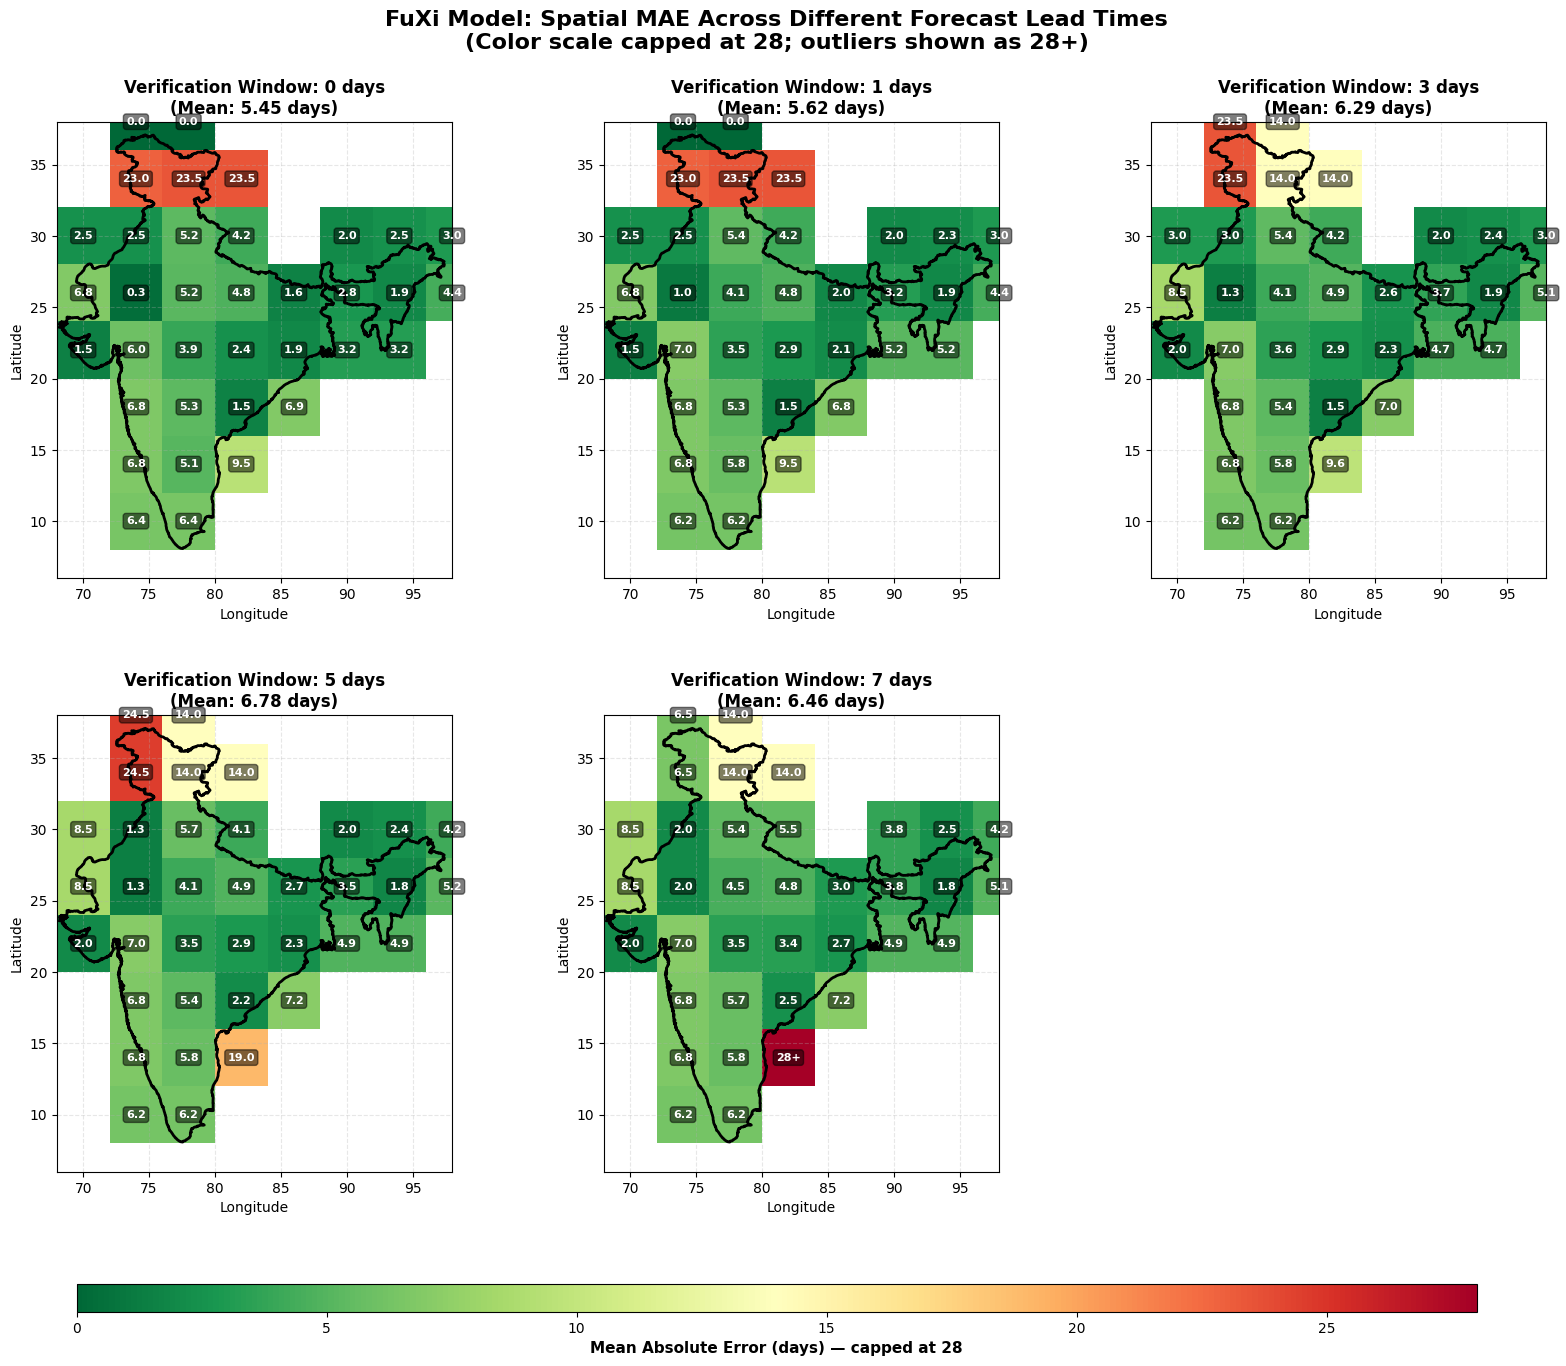

In [27]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from scipy.ndimage import distance_transform_edt
from shapely.geometry import box

CAP = 28
vmin_tight = 0
vmax_tight = CAP

def impute_nearest(Z):
    """Fill NaNs with nearest non-NaN value."""
    mask = np.isnan(Z)
    if not mask.any():
        return Z
    ind = distance_transform_edt(mask, return_distances=False, return_indices=True)
    return Z[tuple(ind)]

def get_india_mask(lon_edges, lat_edges, india_shp):
    """Create a boolean mask for cells that intersect with India."""
    india_union = india_shp.unary_union
    
    n_lat = len(lat_edges) - 1
    n_lon = len(lon_edges) - 1
    mask = np.zeros((n_lat, n_lon), dtype=bool)
    
    for ii in range(n_lat):
        for jj in range(n_lon):
            # Create a box for this cell
            cell = box(lon_edges[jj], lat_edges[ii], lon_edges[jj+1], lat_edges[ii+1])
            # Check if cell intersects India
            mask[ii, jj] = india_union.intersects(cell)
    return mask

# ---- figure ----
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
axes = axes.flatten()
images = []

for idx, vw in enumerate(VERIFICATION_WINDOWS):
    ax = axes[idx]
    mae_xr = verification_results["FuXi"][vw]["spatial"]["mean_mae"]

    lon_c = mae_xr.lon.values
    lat_c = mae_xr.lat.values
    Z     = mae_xr.values.copy()

    # ensure increasing order
    if not np.all(np.diff(lon_c) > 0):
        j = np.argsort(lon_c); lon_c = lon_c[j]; Z = Z[:, j]
    if not np.all(np.diff(lat_c) > 0):
        i = np.argsort(lat_c); lat_c = lat_c[i]; Z = Z[i, :]

    # Compute edges
    lon_spacing = lon_c[1] - lon_c[0]
    lat_spacing = lat_c[1] - lat_c[0]
    
    lon_edges = np.append(lon_c, lon_c[-1] + lon_spacing)
    lat_edges = np.append(lat_c, lat_c[-1] + lat_spacing)

    # Get mask for cells that intersect India
    india_mask = get_india_mask(lon_edges, lat_edges, india_shp)
    
    # Set cells outside India to NaN before imputation
    Z[~india_mask] = np.nan
    
    # Impute NaNs only for cells inside India
    Z_imputed = impute_nearest(Z)
    
    # Re-apply mask
    Z_imputed[~india_mask] = np.nan

    im = ax.pcolormesh(
        lon_edges, lat_edges, Z_imputed,
        cmap="RdYlGn_r",
        vmin=vmin_tight, vmax=vmax_tight,
        shading="flat",
    )
    images.append(im)

    india_shp.boundary.plot(ax=ax, edgecolor="black", linewidth=2)

    # Place labels at true cell centers (only for India cells)
    for ii in range(len(lat_c)):
        for jj in range(len(lon_c)):
            val = Z_imputed[ii, jj]
            if not np.isnan(val):
                x_center = (lon_edges[jj] + lon_edges[jj + 1]) / 2
                y_center = (lat_edges[ii] + lat_edges[ii + 1]) / 2
                ax.text(
                    x_center, y_center, 
                    f"{CAP}+" if val > CAP else f"{val:.1f}",
                    ha="center", va="center", fontsize=8, fontweight="bold",
                    color="white",
                    bbox=dict(boxstyle="round,pad=0.25", facecolor="black", alpha=0.5),
                )

    ax.set_xlabel("Longitude", fontsize=10)
    ax.set_ylabel("Latitude", fontsize=10)
    ax.set_title(f"Verification Window: {vw} days\n(Mean: {np.nanmean(Z_imputed):.2f} days)",
                 fontsize=12, fontweight="bold")
    ax.grid(True, alpha=0.3, linestyle="--")
    ax.set_xlim(68, 98)
    ax.set_ylim(6, 38)

# hide unused panel(s)
for k in range(len(VERIFICATION_WINDOWS), len(axes)):
    fig.delaxes(axes[k])

# Layout and colorbar
fig.subplots_adjust(top=0.90, bottom=0.15, hspace=0.30, wspace=0.20)

cbar_ax = fig.add_axes([0.15, 0.05, 0.70, 0.02])
sm = ScalarMappable(norm=Normalize(vmin=vmin_tight, vmax=vmax_tight), cmap="RdYlGn_r")
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation="horizontal")
cbar.set_label(f"Mean Absolute Error (days) — capped at {CAP}", fontsize=11, fontweight="bold")
cbar.ax.tick_params(labelsize=10)

fig.suptitle(
    "FuXi Model: Spatial MAE Across Different Forecast Lead Times\n"
    "(Color scale capped at 28; outliers shown as 28+)",
    fontsize=16, fontweight="bold"
)
fig.savefig("outputs/fuxi_spatial_mae.png", dpi=150, bbox_inches="tight")
plt.show()

## 3.3 Detailed Metrics Table

In [ ]:
# Print detailed summary for each model
for model_name in MODEL_PATHS.keys():
    print(f"\n{'='*100}")
    print(f"{model_name.upper()} MODEL: VERIFICATION WINDOW ANALYSIS")
    print(f"{'='*100}")
    print(vw_dfs[model_name].to_string())
    print(f"{'='*100}")

### Key Insights from Lead Time Analysis

**Questions to consider:**
- Which model maintains performance best at longer lead times?
- At what lead time does performance degrade significantly for each model?
- Are certain spatial regions more challenging to predict at longer lead times?
- What is the practical forecast horizon for reliable monsoon onset prediction?

---

# Summary and Recommendations

## What We Learned

This notebook demonstrated a complete benchmarking workflow for monsoon onset prediction models:

### 1. **Baseline Comparison** (Section 1)
- Compared FuXi against two established baselines (AIFS and Graphcast)
- Generated spatial performance metrics and quantitative comparisons
- Identified strengths and weaknesses of each model

### 2. **Parameter Sensitivity** (Section 2)
- Tested robustness to MOK date parameter
- Revealed how parameter choices affect conclusions
- Highlighted regions sensitive to methodological choices

### 3. **Practical Forecasting Skill** (Section 3)
- Evaluated performance across forecast lead times
- Determined practical prediction horizons for each model
- Compared degradation rates between models

## Key Outputs for Presentation

The following visualizations are particularly compelling for presentations:

1. **Model comparison chart** (`model_comparison_chart.png`)
2. **MOK sensitivity spatial maps** (`mok_sensitivity_spatial.png`)
3. **Lead time degradation curves** (`verification_window_comparison.png`)
4. **Spatial performance maps** for each model

## Best Practices Demonstrated

- ✅ Compare against multiple baselines
- ✅ Test sensitivity to key parameters
- ✅ Evaluate across multiple years
- ✅ Visualize both spatial and aggregate metrics
- ✅ Consider practical forecasting scenarios (lead time)

## Next Steps

Consider extending this analysis with:
- Additional years of data (2023-2024)
- Climatology baseline comparison
- Regional breakdowns (CMZ vs other zones)
- Seasonal/interannual variability analysis
- Statistical significance testing

In [ ]:
print("\n" + "="*80)
print("RESEARCHER USE CASE NOTEBOOK COMPLETE")
print("="*80)
print(f"\nAll outputs saved to: {output_dir}")
print("\nGenerated files:")
for f in sorted(output_dir.glob("*.png")):
    print(f"  - {f.name}")
print("\n" + "="*80)